# Maximum likelihood estimation

In this section, we will cover a basic review of _maximum likelihood estimation_ -- a general approach to fitting a statistical model to observed data. The goal will be to introduce the Gaussian model of linear regression, wherein we make the explicit assumption that the errors of the linear regression model follow a normal distribution. We will then review some basic tools for evaluating whether or not this assumption holds in practice. Later, we will use this model to build tools to perform statistical inference on the parameters of the linear regression model, such as performing hypothesis tests and creating confidence intervals for parameters.

## Review of the general theory of maximum likelihood

Maximum likelihood estimation is a general framework for estimating the parameters of a statistical model. The approach works as follows: we observe data $z_1,\dots, z_n$, which we assume to be drawn independently and identically distributed from some distribution $p_{\boldsymbol{\theta}}(z)$ which is parameterized by an unknown vector of parameters $\boldsymbol{\theta} \in \Theta$. For example, we might suppose that $z_1,\dots,z_n$ all are drawn from a normal distribution:

$$
z_1,\dots,z_n \sim N(\mu,\sigma^2)
$$

where in this case $\boldsymbol{\theta} = (\mu, \sigma^2)$ are the parameters of the model. Our goal is to, given the observations $z_1,\dots, z_n$, estimate the parameters $\boldsymbol{\theta}$. To do this, we first specify the _likelihood_ function, which is simply the joint probability of the sample $z_1,\dots,z_n$. Since these observations are assumed to be statistically independent, this joint probability is simply the product of the individual densities:

$$
p_{\boldsymbol{\theta}}(z_1,\dots,z_n) = \prod_{i=1}^n p_{\boldsymbol{\theta}}(z_i).
$$

This gives a valid probability for any _fixed_ value of $\boldsymbol{\theta}$. However, our goal here is to try and estimate the value of $\boldsymbol{\theta}$ that generated our data. To do this, we instead think of this joint distribution as a function of the parameters $\boldsymbol{\theta}$ (rather than a function of the data). When we do this, we refer to the joint distribution as the _likelihood_ function:

$$
L(\boldsymbol{\theta}; z_1,\dots,z_n) = \prod_{i=1}^n p_{\boldsymbol{\theta}}(z_i).
$$

The principal of maximum likelihood estimation states that we should estimate $\boldsymbol{\theta}$ by choosing the value $\hat{\boldsymbol{\theta}}$ which makes the observed data the most likely, i.e. that maximizes $L(\boldsymbol{\theta}; z_1,\dots,z_n)$. For many statistical models, it will be more convenient to use the logarithm of the likelihood function to perform this maximization instead, or alternatively to minimize the negative log likelihood:

$$
-\ell(\boldsymbol{\theta}; z_1,\dots, z_n) = -\log L(\boldsymbol{\theta}; z_1,\dots, z_n).
$$

(This will give the same result since $-\log$ is a strictly decreasing function.)

Let's work through an example using the normal distribution, both using math and python. To do this, suppose that we generate $n=100$ samples independently from a true distribution of $N(-2, 4)$. In python, we can do this with the following.

In [1]:
import numpy as np

mu_true = -2
sigma2_true = 4
n = 100

# Note: the function np.random.normal takes scale to be
# the standard deviation, not the variance,
# so we need to take the square root
z = np.random.normal(loc=mu_true, scale=np.sqrt(sigma2_true), size=n)
print(z)

[-1.40075466e+00 -8.89938707e-01 -2.90975942e+00 -4.46693521e+00
 -2.42273919e+00 -2.64409999e+00 -5.99048312e-01 -1.12603646e+00
  5.24545006e-01 -4.76980968e+00 -1.43231172e+00 -1.50487775e+00
 -2.35761985e+00 -2.44545865e+00 -8.18473854e-01  1.20750514e+00
 -2.09318729e+00 -2.35951873e+00 -5.86548179e+00  1.22751079e+00
  1.27319064e+00 -4.18959933e+00 -1.24849114e+00 -1.96337963e+00
 -7.04092104e-01 -1.34897117e+00 -2.29693672e-01  5.05275724e-01
 -1.81716173e+00 -2.00280838e+00 -2.33198789e+00 -2.21350064e+00
 -1.42277517e+00  7.93691465e-02 -4.38013764e+00 -4.63397179e+00
 -2.70122062e+00 -4.15311178e+00 -3.54504727e+00 -5.27333357e+00
 -2.11337459e+00 -5.27683630e+00 -1.21513581e+00  1.58098681e-01
 -1.63968420e+00 -4.19061897e+00 -3.39694035e+00 -2.14432587e-01
 -1.15334086e+00 -9.00063036e-01 -6.77922374e+00 -2.76395051e+00
 -1.93161500e+00 -1.55868246e+00 -2.82829810e+00 -4.16212261e+00
 -3.40929435e-01 -3.82900252e+00  1.08855585e+00 -1.06178463e-01
 -1.69268813e+00 -1.28645

Now let's pretend we don't know the values of $(\mu_{true}, \sigma^2_{true})$, and try and estimate them using maximum likelihood estimation. To do this, we first need to write down the likelihood function. For a single observation $z_i$, the density of the $N(\mu,\sigma^2)$ distribution is given by

$$
p_{\mu,\sigma^2}(z) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(z-\mu)^2}{2\sigma^2}}.
$$

The the likelihood function is just the product of $n$ of these:

$$
L(\mu,\sigma^2;z_1,\dots,z_n) = \prod_{i=1}^n p_{\mu,\sigma^2}(z_i) = (2\pi \sigma^2)^{-n/2} e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n (z_i-\mu)^2}.
$$

Now we will use the trick where we try and minimize the negative log likelihood:

$$
\begin{align*}
-\ell(\mu,\sigma^2; z_1,\dots,z_n) &= -\log L(\mu,\sigma^2;z_1,\dots,z_n) \\
&= \frac{n}{2}\log(2\pi \sigma^2) + \frac{1}{2\sigma^2}\sum_{i=1}^n (z_i - \mu)^2.
\end{align*}
$$

To find the minimum of this function (corresponding to the maximum of the likelihood function), we need to take derivatives with respect to $\mu$ and $\sigma^2$ and set them equal to zero. First we do this for $\mu$ to get $\hat{\mu}$:

$$
\begin{align*}
\frac{d}{d\mu}-\ell(\mu,\sigma^2; z_1,\dots,z_n) &= -\frac{1}{\sigma^2}\sum_{i=1}^n (z_i - \mu) = 0 \\
&\implies \hat{\mu} = \frac{1}{n}\sum_{i=1}^n z_i = \bar{z}.
\end{align*}
$$

Next, for $\sigma^2$ we get

$$
\begin{align*}
\frac{d}{d\sigma^2}-\ell(\mu,\sigma^2; z_1,\dots,z_n) &= \frac{n}{2\sigma^2} - \frac{1}{2\sigma^4}\sum_{i=1}^n (z_i-\mu)^2 = 0 \\
&\implies \hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (z_i-\hat{\mu})^2 = \frac{1}{n}\sum_{i=1}^n (z_i-\bar{z})^2.
\end{align*}
$$

These estimators are called the _maximum likelihood estimators_ of $\mu$ and $\sigma^2$. Let's calculate them for the data we sampled above.

In [2]:
mle_mean = np.mean(z)
mle_variance = np.mean((z-np.mean(z))**2)
mle_mean, mle_variance

(-2.025728042987367, 3.4053727202590482)

As we can see, these already do a reasonably good job of estimating our true parameters $\mu_{true}=-2,\sigma^2_{true}=4$.

We might expect that these estimates get better as we gather more samples. Indeed, this is one important property of maximum likelihood estimators: they are asymptotically _consistent_, meaning that, if the true data is actually generated from the model distribution, then

$$
\lim_{n\to \infty} \hat{\boldsymbol{\theta}} = \boldsymbol{\theta}_{true}.
$$

We can simulate this to check that it is indeed the case for the normal distribution example given here. We will do this with the following simulation: for each $n = 5, 10, 20, 40,\cdots, 1280$ we will sample $B=50$ datasets of size $n$, and compute the maximum likelihood estimates of the mean and variance. We will plot this against the ground truth to estimate how quickly these converge.

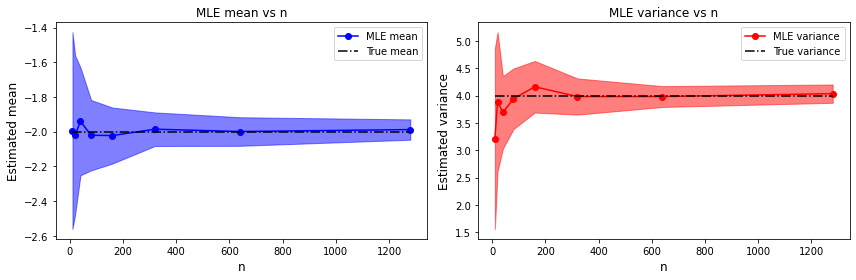

In [3]:
import matplotlib.pyplot as plt

# create a figure for side-by-side plots
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs = axs.flatten()

# specify number of trials and range of n values we'll try
n_trials = 50
n_range = [5*int(2**k) for k in range(1,9)]

mmeans = [] # use this to store the mean of the means
smeans = [] # use this to store the sd of the means

mvars = [] # means of the variances
svars = [] # standard deviation of the variance

for n in n_range:
    curr_means = [] # to store the results at the current step
    curr_vars = []
    for b in range(n_trials):
        z = np.random.normal(loc=mu_true, scale=np.sqrt(sigma2_true), size=n) # generate samples
        curr_means.append(np.mean(z)) # compute MLE mean
        curr_vars.append(np.mean((z-np.mean(z))**2)) # compute MLE variance

    mmeans.append(np.mean(curr_means)) # mean of the means
    smeans.append(np.std(curr_means)) # standard dev of means
    mvars.append(np.mean(curr_vars)) # mean of the variances
    svars.append(np.std(curr_vars)) # standard dev of the variances

# convert these from lists to numpy arrays, makes calculations easier below
mmeans = np.array(mmeans)
smeans = np.array(smeans)
mvars = np.array(mvars)
svars = np.array(svars)

# plot the results for the means, with shaded area represented 1 standard dev
axs[0].plot(n_range, mmeans, marker='o', label="MLE mean", color='blue')
axs[0].fill_between(n_range, mmeans-smeans, mmeans+smeans, color='blue', alpha=0.5)
axs[0].hlines(mu_true, np.min(n_range), np.max(n_range), label="True mean", color='black', linestyle='-.')
axs[0].set_xlabel("n", fontsize=12)
axs[0].set_ylabel("Estimated mean", fontsize=12)
axs[0].set_title("MLE mean vs n", fontsize=12)
axs[0].legend()

# plot the results for the variances, with shaded area represented 1 standard dev
axs[1].plot(n_range, mvars, marker='o', label="MLE variance", color='red')
axs[1].fill_between(n_range, mvars-svars, mvars+svars, color='red', alpha=0.5)
axs[1].hlines(sigma2_true, np.min(n_range), np.max(n_range), label="True variance", color='black', linestyle='-.')
axs[1].set_xlabel("n", fontsize=12)
axs[1].set_ylabel("Estimated variance", fontsize=12)
axs[1].set_title("MLE variance vs n", fontsize=12)
axs[1].legend()

plt.tight_layout()
plt.show()

From the plot we can see that the MLE estimates quickly become very accurate estimates of the true parameter values. Of course, in this setting, we simulated our data, so we _know_ that the normal distribution was the correct model. When this is not the case (as it typically is not in practice), we will need to develop tools to be able to assess our distributional assumptions. Later in this section, we will discuss one such tool.

## The Gaussian model for linear regression
Now that we've reviewed the basics of maximum likelihood estimation, we can apply this approach to our linear model. Let's first write down our basic linear model:

$$
y_i = \boldsymbol{\beta}\cdot \boldsymbol{x}_i + \varepsilon_i,
$$

where so far we have assumed that $\varepsilon_i$ satisfies:

- independence across observations $i$
- zero mean equal variance $\sigma^2$ across observations

To be able to perform maximum likelihood estimation on the parameters $\boldsymbol{\beta}$ of our linear model, we will need to add a bit more than this. In particular, we will assume that the errors follow a normal distribution (also called the Gaussian distribution), so that

$$
\varepsilon_1,\dots,\varepsilon_n \stackrel{i.i.d.}{\sim} N(0,\sigma^2).
$$

Moreover, we will continue to assume that the $\boldsymbol{x}_i$'s are known and not random. Then this means that the response $y_i$ is modeled to be the sum of a non-random term $\boldsymbol{\beta}\cdot \boldsymbol{x}_i$, plus a normally distributed random variable $\varepsilon_i \sim N(0,\sigma^2)$. Hence under this model, $y_i \sim N(\boldsymbol{\beta}\cdot \boldsymbol{x}_i, \sigma^2)$.

Now we can write down the joint likelihood of $y_1,\dots,y_n$ conditioned on $\boldsymbol{x}_1,\dots,\boldsymbol{x}_n$ _and_ the parameters $\boldsymbol{\beta},\sigma^2$. (Note that $\sigma^2$ is also a parameter than we need to estimate in this model!)

$$
L(\boldsymbol{\beta},\sigma^2\mid (\boldsymbol{x}_i,y_i)_{i=1}^n)=p(y_1,\dots,y_n\mid \boldsymbol{x}_1,\dots,\boldsymbol{x}_n,\boldsymbol{\beta},\sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(y_i - \boldsymbol{\beta}\cdot \boldsymbol{x}_i)}{2\sigma^2}}
$$

The negative log-likelihood becomes:

$$
\begin{align*}
-\ell(\boldsymbol{\beta},\sigma^2\mid (\boldsymbol{x}_i,y_i)_{i=1}^n) &= -\log L(\boldsymbol{\beta},\sigma^2\mid (\boldsymbol{x}_i,y_i)_{i=1}^n)\\
&= \frac{n}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - \boldsymbol{\beta}\cdot \boldsymbol{x}_i)^2 \\
&= \frac{n}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2}\|\boldsymbol{y} - \boldsymbol{X\beta}\|_2^2,
\end{align*}
$$

where here we've defined $\boldsymbol{X}$ to be the matrix containing $\boldsymbol{x}_1,\dots,\boldsymbol{x}_n$ as its rows, and $\boldsymbol{y}$ to be the vector containing $y_1,\dots,y_n$. Notice that the term that depends on $\boldsymbol{\beta}$ is exactly our least squares objective $\|\boldsymbol{y} - \boldsymbol{X\beta}\|_2^2$! This means if we take derivatives with respect to $\boldsymbol{\beta}$ and set them equal to zero, we will get exactly our usual solution back:

$$
\hat{\boldsymbol{\beta}} = (\boldsymbol{X^\top X})^{-1} \boldsymbol{X^\top y}.
$$

This means that our usual least squares estimates for the parameters of the linear regression model _are the maximum likelihood estimates of $\boldsymbol{\beta}$ under the Gaussian model_. Previously, we chose the least-squares problem as a reasonable heuristic to use to fit a linear regression, but now maximum likelihood gives us a principled statistical model that naturally yields the same estimator.

For $\sigma^2$, the derivation works essentially the same as in our simple normal MLE problem above:

$$
\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \boldsymbol{\beta}\cdot \boldsymbol{x}_i)^2 = \frac{1}{n}\|\boldsymbol{y}-\hat{\boldsymbol{y}}\|_2^2.
$$

While none of this is particularly new -- we obtain the same quantities we got before ever explicitly introducing the Gaussian model -- we can now do some additional cool things. For example, we can actually derive the distribution of the parameters $\hat{\boldsymbol{\beta}}$. To do this, note that $\hat{\boldsymbol{\beta}}$ is a linear function of $\boldsymbol{y}$, hence

$$
\begin{align*}
\hat{\boldsymbol{\beta}} &= (\boldsymbol{X^\top X})^{-1} \boldsymbol{X^\top y}\\
&= (\boldsymbol{X^\top X})^{-1} \boldsymbol{X^\top (\underbrace{\boldsymbol{X\beta}_\star + \boldsymbol{\varepsilon}}_{(i)})}\\
&= (\boldsymbol{X^\top X})^{-1} \boldsymbol{X^\top X \beta}_\star + (\boldsymbol{X^\top X})^{-1} \boldsymbol{X^\top\varepsilon}\\
&= \boldsymbol{\beta}_\star + (\boldsymbol{X^\top X})^{-1} \boldsymbol{X^\top\varepsilon}
\end{align*}
$$

Here $(i)$ holds because we are assuming that there is some true underlying linear model, i.e. that $\boldsymbol{y} = \boldsymbol{X\beta}_\star + \boldsymbol{\varepsilon}$ for some unknown parameters $\boldsymbol{\beta}_\star$. Under this assumption, we get a linear combination of two terms: the first is $\boldsymbol{\beta}_\star$, or the "true" regression parameters, which we assume have generated our data. The second is $(\boldsymbol{X^\top X})^{-1} \boldsymbol{X^\top\varepsilon}$, which is really just a linear transformation of the Gaussian random vector $\boldsymbol{\varepsilon}$, which itself will follow a normal distribution. Let's figure out what its parameters are. Since $\mathbb{E}[\boldsymbol{\varepsilon}] = 0$, we have

$$
\mathbb{E}[(\boldsymbol{X^\top X})^{-1} \boldsymbol{X^\top\varepsilon}] = 0.
$$

To compute the variance, we need the following fact: if $\boldsymbol{Z} \sim N(0,\sigma^2 \boldsymbol{I})$ and $\boldsymbol{A}$ is a matrix, then $\boldsymbol{AZ} \sim N(0, \sigma^2\boldsymbol{AA^\top})$.

Hence, the variance of $\hat{\boldsymbol{\beta}}$ is

$$
\text{Cov}[(\boldsymbol{X^\top X})^{-1} \boldsymbol{X^\top\varepsilon}] =  (\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top}\sigma^2 \boldsymbol{I}\boldsymbol{X}(\boldsymbol{X^\top X})^{-1}= \sigma^2 (\boldsymbol{X^\top X})^{-1}.
$$

Thus we have finally that

$$
\hat{\boldsymbol{\beta}} \sim N(\boldsymbol{\beta}_\star, \sigma^2 (\boldsymbol{X^\top X})^{-1}).
$$

From this we can get a few things: first, we know that $\hat{\boldsymbol{\beta}}$ is an _unbiased_ estimator of the true regression coefficients, meaning that $\mathbb{E}[\hat{\boldsymbol{\beta}}] = \boldsymbol{\beta}_\star$. Second, we can derive the marginal distribution of each individual coefficient: $\beta_j \sim N(\beta_{\star,j}, \sigma^2 (\boldsymbol{X^\top X})^{-1}_{jj})$ where $(\boldsymbol{X^\top X})^{-1}_{jj}$ is the $j$th diagonal entry of the matrix $(\boldsymbol{X^\top X})^{-1}$. This can be used, for example, to construct confidence intervals for the values of the coefficients. Note that all the variances here depend on $\sigma^2$, which is unknown, so in practice we will simply plug in the estimated value $\hat{\sigma}^2$, and sometimes switch to using the $t$-distribution to account for the fact that we must also estimate the variance; we will talk more about this in another section.

> Remark: when we say "distribution of $\hat{\boldsymbol{\beta}}$" we need to be clear what randomness we're talking about. Specifically, we mean randomness that comes from the response $y_i$ _conditioned on_ $\boldsymbol{x}_i$. So if we're being careful about notation, we should really write $\hat{\boldsymbol{\beta}}\mid \boldsymbol{X} \sim N(\boldsymbol{\beta}_\star, \sigma^2 (\boldsymbol{X^\top X})^{-1})$ to indicate that the _conditional distribution_ of $\hat{\boldsymbol{\beta}}$ _given_ $\boldsymbol{X}$ follows this normal distribution.

Let's work through a simple example of obtaining the full distribution of the regression coefficients. For this, we will use the fish toxicity dataset, which attempts to predict the toxicity of certain drugs for a type of fish using various molecular properties of the drugs.

In [4]:
import pandas as pd

dataset = pd.read_csv("datasets/qsar_fish_toxicity.csv")
dataset.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


As usual, we will extract the response as a numpy array, and the other two features (`age` and `education_years`) as another array, adding a column of 1's to account for the intercept term in the regression.

In [5]:
# extract the data
y = dataset["LC50"].to_numpy()
cols = [c for c in dataset.columns if c!="LC50"]
X = dataset[cols].to_numpy()

# add a column of ones to the X matrix
ones = np.ones(X.shape[0]).reshape(-1,1)
X = np.hstack([ones, X])

X.shape, y.shape

((908, 7), (908,))

Next, we need to fit the regression model to get the coefficients $\hat{\boldsymbol{\beta}}$, and also get the estimated value $\hat{\sigma}^2$.

In [6]:
# compute beta_hat = (XTX)^{-1}XTy
XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
beta_hat = np.dot(XTX_inv, np.dot(X.T, y))

# compute sigma2_hat = |y-y_hat|^2/n
y_hat = np.dot(X, beta_hat)
sigma2_hat = np.mean((y-y_hat)**2)

# print the coefficients and the estimated variance for each coefficient
cols = ["intercept"] + cols
for j in range(len(cols)):
    sigma2_hat_j = sigma2_hat*XTX_inv[j,j]
    print(f"coefficent for {cols[j]}: {round(beta_hat[j],4)}, variance for {cols[j]}: {round(sigma2_hat_j,4)}")

coefficent for intercept: 2.1746, variance for intercept: 0.0326
coefficent for CIC0 : 0.3856, variance for CIC0 : 0.0037
coefficent for SM1_Dz(Z) : 1.2556, variance for SM1_Dz(Z) : 0.0075
coefficent for GATS1i : -0.7464, variance for GATS1i : 0.0102
coefficent for NdsCH: 0.4136, variance for NdsCH: 0.0029
coefficent for NdssC: 0.0643, variance for NdssC: 0.0016
coefficent for MLOGP: 0.3901, variance for MLOGP: 0.0011


In this section, we covered the basics of maximum likelihood estimation, and saw that if we assume a Gaussian model for the errors in linear regression, use the ML framework to obtain the same least-squares estimates for the parameters as we had before. In the coming sections, we will 1) develop diagnostic tools for assessing the plausibility of the Gaussian model and 2) use the Gaussian model to perform statistical inference, such as hypothesis tests and confidence intervals for the coefficients.
<!--
## Checking the assumptions of the Gaussian model using QQ plots
In the above, we found that we could get a full distribution of the coefficients $\hat{\boldsymbol{\beta}}$ for the Gaussian model of linear regression. In practice, however, if we'd like to use these results, we need to verify that this model is actually reasonable for the data we've obtained. Recall that this model critically relied on two assumptions:

1. The model is linear, so $y_i = \boldsymbol{\beta}_\star \cdot \boldsymbol{x}_i + \varepsilon_i$ for some coefficients $\boldsymbol{\beta}_\star$
2. The errors $\varepsilon_i$ are drawn i.i.d. from a normal distribution $N(0,\sigma^2)$.

In practice, it's unlikely that either of these are _exactly_ true. However, they may be close enough to being true to yield meaningful results. (See the [famous quote](https://en.wikipedia.org/wiki/All_models_are_wrong) by the statistical George Box.) We will discuss more about the assumption of linearity later; in this section, we will focus on checking whether or not the errors appear to follow a normal distribution. -->